##LAB 12 - Week 4 – Programming Challenges

Presentado por: David Rojas Carranza - Grupo 19



Programming Assignment : Maximum Value of the Loot

*   Task. The goal in this code problem is to implement the binary search algorithm.
*   Input Format. The first line of the input contains an integer 𝑛and a sequence 𝑎0< 𝑎1< . . . < 𝑎𝑛−1of 𝑛pairwise distinct positive integers in increasing order. The next line contains an integer 𝑘and 𝑘positive integers 𝑏0, 𝑏1, . . . , 𝑏𝑘−1.
*   Constraints. 1≤𝑘≤105; 1≤𝑛≤3·104; 1≤𝑎𝑖≤109for all 0≤𝑖< 𝑛;1≤𝑏𝑗≤109for all 0≤𝑗< 𝑘;
*   Output Format. For all 𝑖from 0 to 𝑘−1, output an index 0≤𝑗≤𝑛−1 such that 𝑎𝑗= 𝑏𝑖or−1if thereis no such index.



In [ ]:
import math
def binary_search(A,low,high,key): 
    ''' 
    Busqueda binaria
    '''

    if high<low: 
        return -1 
    mid = math.floor(low+((high-low)/2))
    if key == A[mid]: 
        return mid 
    elif key<A[mid]: 
        return binary_search(A,low,mid-1,key)
    else: 
        return binary_search(A,mid+1,high,key)

def objectives(A,Guess): 
    '''
    bucle para todas las busquedas del arreglo
    '''
    Target=[] 
    for i in range(len(Guess)): 
        Target.append(binary_search(A,0,len(A)-1,Guess[i]))
    return Target



A = [int(i) for i in input().split()] 
Guess = [int(i) for i in input().split()]
A=A[1:]
Guess=Guess[1:]

print(' '.join([str(i) for i in objectives(A,Guess)]))

##Programming Assignment : Organizing a Lottery

*    Task. You are given a set of points on a line and a set of segments on a line. The goal is to compute, foreach point, the number of segments that contain this point.
*    Input Format. The first line contains two non-negative integers 𝑠and 𝑝defining the number of segmentsand the number of points on a line, respectively. The next 𝑠lines contain two integers 𝑎𝑖, 𝑏𝑖definingthe 𝑖-thsegment [𝑎𝑖, 𝑏𝑖]. The next line contains 𝑝integers defining points 𝑥1, 𝑥2, . . . , 𝑥𝑝.
*    Constraints. 1≤𝑠,𝑝≤50000;−108≤𝑎𝑖≤𝑏𝑖≤108for all 0≤𝑖< 𝑠;−108≤𝑥𝑗≤108for all 0≤𝑗< 𝑝.
*    Output Format. Output 𝑝non-negative integers 𝑘0, 𝑘1, . . . , 𝑘𝑝−1where 𝑘𝑖is the number of segments which contain 𝑥𝑖.



In [ ]:
def organizing_lottery(lista,s):
    for i in range(s):
        a, b = [int(i) for i in input().split()]
        lista.append((a,'l'))
        lista.append((b,'r'))

    points = input().split()
    for i in points:
        lista.append((int(i),'p'))
    lista.sort()
    segment_count = 0
    point_segment_map = dict()
    for i in lista:
        if i[1] == 'l': segment_count += 1
        elif i[1] == 'r': segment_count -= 1
        else:
            point_segment_map[i[0]] = segment_count

    temp = ''
    for i in points:
        temp += str(point_segment_map[int(i)]) + ' '
    return(temp[:-1])

lista = list()
seg, point = [int(i) for i in input().split()]
print(organizing_lottery(lista,seg))

##Programming Assignment : Closest Points

*   Task. Given 𝑛points on a plane, find the smallest distance between a√︀pair of two (different) points. Recallthat the distance between points (𝑥1, 𝑦1) and (𝑥2, 𝑦2) is equal to sqrt((𝑥1−𝑥2)2+ (𝑦1−𝑦2)2).
*   Input Format. The first line contains the number 𝑛of points. Each of the following 𝑛lines defines a point(𝑥𝑖, 𝑦𝑖).
*   Constraints. 2≤𝑛≤105;−109≤𝑥𝑖, 𝑦𝑖≤109 are integers.
*   Output Format. Output the minimum distance. The absolute value of the difference between the answerof your program and the optimal value should be at most 10−3. To ensure this, output your answerwith at least four digits after the decimal point (otherwise your answer, while being computed correctly,can turn out to be wrong because of rounding issues).



In [ ]:
#Este ejercicio esta basado en Closest Pair of Points using Divide and Conquer algorithm

#Uses python3
import sys
import math

def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)  
    mx_x = p_x[ln_x // 2][0]  

    
    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  
    ln_y = len(s_y)  
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):  
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi:  
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)  
    if ln_ax <= 3:
        return brute(ax)  
    mid = ln_ax // 2  
    Qx = ax[:mid]  
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)

  
    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)

    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)

    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0]) 
    ay = sorted(a, key=lambda x: (x[1], x[0]))  
    p1, p2, mi = closest_pair(ax, ay)  
    return mi


# Input
points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

##Coursera Submission
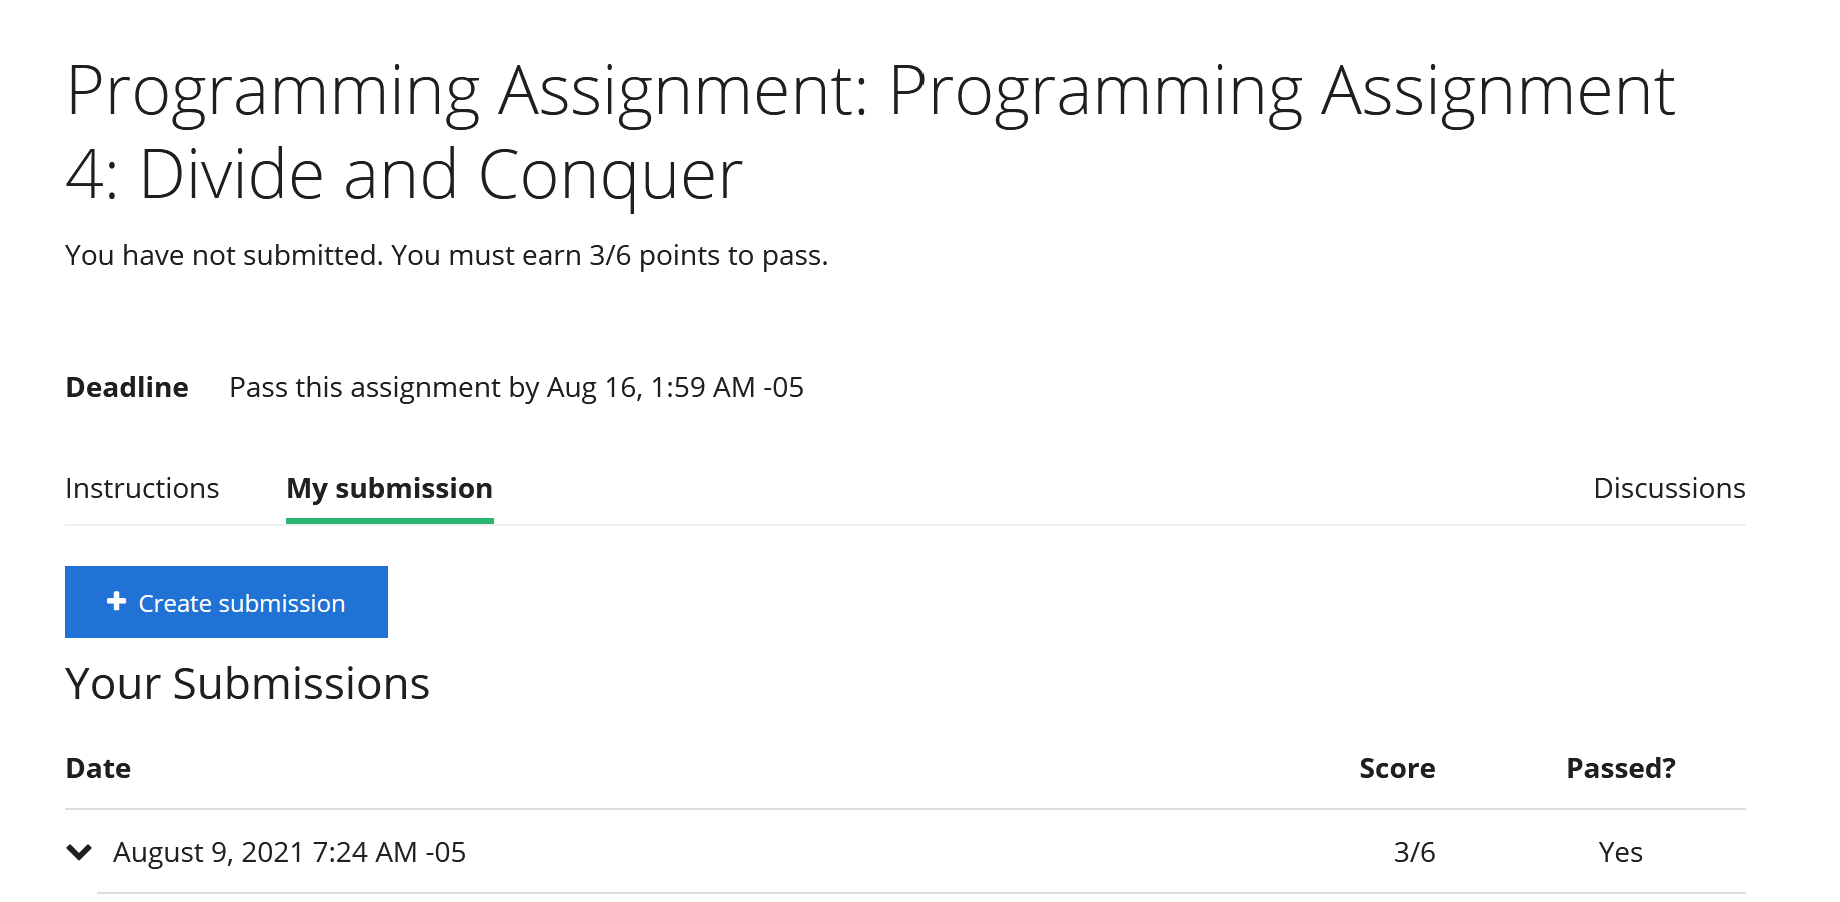